In [ ]:
import pandas as pd
order_df = pd.read_csv("order.csv")
print(order_df.shape)
print(order_df.head(10))

(49999, 12)
                           order_id  quantity  \
0  2e7a8482f6fb09756ca50c10d7bfc047         2   
1  2e7a8482f6fb09756ca50c10d7bfc047         1   
2  e5fa5a7210941f7d56d0208e4e071d35         1   
3  3b697a20d9e427646d92567910af6d57         1   
4  71303d7e93b399f5bcd537d124c0bcfa         1   
5  be5bc2f0da14d8071e2d45451ad119d9         1   
6  0a0837a5eee9e7a9ce2b1fa831944d27         1   
7  1ff217aa612f6cd7c4255c9bfe931c8b         1   
8  22613579f7d11cc59c4347526fc3c79e         1   
9  356b492aba2d1a7da886e54e0b6212b7         1   

                         product_id    price  \
0  f293394c72c9b5fafd7023301fc21fc2  1489000   
1  c1488892604e4ba5cff5b4eb4d595400  1756000   
2  f3c2d01a84c947b078e32bbef0718962  1707000   
3  3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4  d2998d7ced12f83f9b832f33cf6507b6  3833000   
5  fd7fd78fd3cbc1b0a6370a7909c0a629  1480000   
6  583916a5dae918f5e89baec139141c54  4489000   
7  33430c5c1027d812b5c62f778e5ee7f7   822000   
8  3ff81cd0e0861

In [2]:
# Quick summary  dari segi kuantitas, harga, freight value, dan weight
print(order_df.describe())
# Median dari total pembelian konsumen per transaksi kolom price
print(order_df.loc[:, 'price'].median())

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49980.000000
mean       1.197484  2.607784e+06  104521.390428          2201.830892
std        0.722262  1.388312e+06   55179.844962          3929.896875
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000
2610000.0


C:\Users\Tomcat\AppData\Roaming\Python\Python310\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


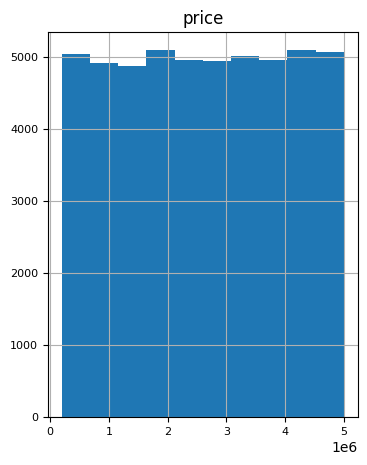

In [3]:
import matplotlib.pyplot as plt

# plot histogram kolom: price
order_df[['price']].hist(figsize=(4, 5), bins=10, xlabelsize=8, ylabelsize=8)
plt.show()  # Untuk menampilkan histogram plot

In [4]:
# Standar variasi kolom product_weight_gram
print(order_df.loc[:, "product_weight_gram"].std())
# Varians kolom product_weight_gram
print(order_df.loc[:, "product_weight_gram"].var())

3929.8968753726213
15444089.451063491


In [5]:
# Hitung quartile 1
Q1 = order_df[['product_weight_gram']].quantile(0.25)
# Hitung quartile 3
Q3 = order_df[['product_weight_gram']].quantile(0.75)
# Hitung inter quartile range dan cetak ke console
IQR = Q3 - Q1
print(IQR)

product_weight_gram    1550.0
dtype: float64


In [6]:
# Ganti nama kolom freight_value menjadi shipping_cost
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
print(order_df)

                               order_id  quantity  \
0      2e7a8482f6fb09756ca50c10d7bfc047         2   
1      2e7a8482f6fb09756ca50c10d7bfc047         1   
2      e5fa5a7210941f7d56d0208e4e071d35         1   
3      3b697a20d9e427646d92567910af6d57         1   
4      71303d7e93b399f5bcd537d124c0bcfa         1   
...                                 ...       ...   
49994  ec88157ad03aa203c3fdfe7bace5ab6b         1   
49995  ed60085e92e2aa3debf49159deb34da7         1   
49996  ed98c37d860890f940e2acd83629fdd1         2   
49997  ed98c37d860890f940e2acd83629fdd1         1   
49998  ede4ebbb6e36cbd377eabcc7f5229575         1   

                             product_id    price  \
0      f293394c72c9b5fafd7023301fc21fc2  1489000   
1      c1488892604e4ba5cff5b4eb4d595400  1756000   
2      f3c2d01a84c947b078e32bbef0718962  1707000   
3      3ae08df6bcbfe23586dd431c40bddbb7  3071000   
4      d2998d7ced12f83f9b832f33cf6507b6  3833000   
...                                 ...      ...   

In [7]:
# Hitung rata rata dari price per payment_type
rata_rata = order_df["price"].groupby(order_df["payment_type"]).mean()
print(rata_rata)

payment_type
credit card        2.600706e+06
debit card         2.611974e+06
e-wallet           2.598562e+06
virtual account    2.619786e+06
Name: price, dtype: float64


In [ ]:
# Hitung harga maksimum pembelian customer
sort_harga = order_df.sort_values(by="quantity", ascending=False)
sort_harga.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
19390,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,3927000,2709af9587499e95e803a6498a5a56e9,114000,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-17,e-wallet,utilities,1000.0
19370,8272b63d03f5f79c56e9e4120aec44ef,20,270516a3f41dc035aa87d220228f844c,4775000,2709af9587499e95e803a6498a5a56e9,167000,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-17,virtual account,beauty,800.0
25444,ab14fdcfbe524636d65ee38360e22ce8,20,9571759451b1d780ee7c15012ea109d4,4947000,ce27a3cc3c8cc1ea79d11e561e9bebb6,67000,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23,virtual account,electronics,1400.0
19371,8272b63d03f5f79c56e9e4120aec44ef,19,270516a3f41dc035aa87d220228f844c,3400000,2709af9587499e95e803a6498a5a56e9,32000,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-17,debit card,electronics,800.0
25445,ab14fdcfbe524636d65ee38360e22ce8,19,9571759451b1d780ee7c15012ea109d4,776000,ce27a3cc3c8cc1ea79d11e561e9bebb6,163000,bd5d39761aa56689a265d95d8d32b8be,delivered,2017-08-23,virtual account,toys,1400.0


payment_type
credit card        2587500.0
debit card         2621500.0
e-wallet           2589000.0
virtual account    2643000.0
Name: price, dtype: float64
                               order_id  quantity  \
23829  7d63cb1d349e7bd0ee1edcc61ea71077         1   
12011  00c9f7d4b0e87781465e562dc109f6aa         1   
10984  69013d19f8db4cd7dc9f3b5c2564a96f         1   
29722  f32c4d2b078bc5a354f4c1184522b5ff         1   
15259  c8eab0ccabe8cdfc2afce66c1c554ae2         1   
...                                 ...       ...   
2891   1d0e8770169496e47622b6cbc0d10bda         1   
36815  4bff82a994068f564e54b52b08ef4512         2   
8175   e6b1fa22555c3064f984ebeb8a88de77         1   
4034   8ac2728285fd4228f35d907768b5288a         4   
32994  0286e258217733541e80588e29c208c1         1   

                             product_id    price  \
23829  75d6b6963340c6063f7f4cfcccfe6a30  1472000   
12011  1a0d662b65b5ef08796501b064c853af  4543000   
10984  10d196ec072e2d8382c7ec9c942d7ea8  4137000  

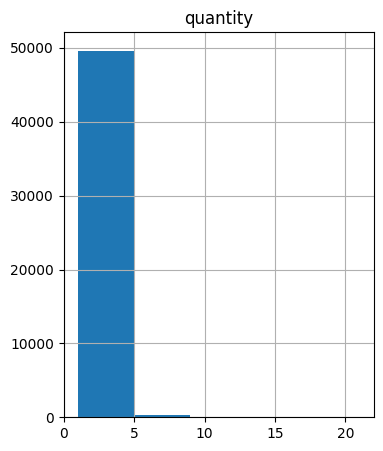

In [9]:
# Median price yang dibayar customer dari masing-masing metode pembayaran. 
median_price = order_df["price"].groupby(order_df["payment_type"]).median()
print(median_price)
# Ubah freight_value menjadi shipping_cost dan cari shipping_cost 
# termahal dari data penjualan tersebut menggunakan sort.
order_df.rename(columns={"freight_value": "shipping_cost"}, inplace=True)
sort_value = order_df.sort_values(by="shipping_cost", ascending=0)
print(sort_value)
# Untuk product_category_name, berapa  rata-rata weight produk tersebut 
# dan standar deviasi mana yang terkecil dari weight tersebut, 
mean_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).mean()
print(mean_value.sort_values())
std_value = order_df["product_weight_gram"].groupby(order_df["product_category_name"]).std()
print(std_value.sort_values())
# Buat histogram quantity penjualan dari dataset tersebutuntuk melihat persebaran quantity 
# penjualan tersebut dengan bins = 5 dan figsize= (4,5)
order_df[["quantity"]].hist(figsize=(4, 5), bins=5)
plt.show()